In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',100)

In [2]:
##STEP 1 CHANGE COLUMN NAMES TO REAL NAMES
data_dict = {
    'P(IPO)':'offer_price',
    'P(H)': 'price_range_higher_bound',
    'P(L)': 'price_range_lower_bound',
    'P(1Day)':'first_day_trading_price',
    'C1':'days',
    'C2':'top_tier_dummy',
    'C3':'earnings_per_share',
    'C4':'prior_nasdaq_15day_returns',
    'C5':'outstanding_shares',
    'C6':'offering_shares',
    'C7':'sales',
    'T1':'number_of_sentences',
    'T2':'number_of_words',
    'T3':'number_of_real_words',
    'T4':'number_of_long_sentences',
    'T5':'number_of_long_words',
    'S1':'number_of_positive_words',
    'S2':'number_of_negative_words',
    'S3':'number_of_uncertain_words',
    'Y1':'pre_ipo_price_revision',
    'Y2':'post_ipo_initial_return',
    'C3':'positive_eps_dummy',
    'C5':'share_overhang',
    'C6':'up_revision',
    'I1':'ticker',
    'I2':'company_name',
    'I3':'industry_classifier'
    
}

In [3]:
df = pd.read_excel('Competition1_raw_data.xlsx')
df.rename(columns=data_dict,inplace=True)
df.head()

,ticker,company_name,industry_classifier,offer_price,price_range_higher_bound,price_range_lower_bound,first_day_trading_price,days,top_tier_dummy,positive_eps_dummy,prior_nasdaq_15day_returns,share_overhang,up_revision,sales,number_of_sentences,number_of_words,number_of_real_words,number_of_long_sentences,number_of_long_words,number_of_positive_words,number_of_negative_words,number_of_uncertain_words
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10,9.5,8.5,11.87,122,1,3.43,0.0290743,40962052,10600000,51.345,470,12719,11560,301,690,62,117,139
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8,10,8,7.25,259,0,-1.62,-0.0133516,28869196,2400000,25.936,791,21792,19585,510,1120,71,242,237
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7,14,12,6.7,90,1,-1.24,0.020715,16845668,5000000,7.378,201,5262,4785,128,325,61,33,60
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16,14,12.39,209,1,-0.91,0.0200231,14848637,4500000,8.526,328,8259,7574,177,509,80,59,110
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21,21,19,56.6,80,1,0.07,-0.0348947,30741716,8250000,632.298,572,14830,13176,336,720,67,149,167


In [4]:
#JUST MAKING SURE THIS WORKS THE WAY I THINK IT WORKS
print(df.replace('-',np.nan).isna().sum().sales == len(df[df['sales']=='-']))

#PRINT NUMBER OF MISSING VALUES IN EACH COLUMN
df.replace('-',np.nan).isna().sum()

True


ticker                         0
company_name                   0
industry_classifier            8
offer_price                    5
price_range_higher_bound      10
price_range_lower_bound       10
first_day_trading_price       22
days                          22
top_tier_dummy                22
positive_eps_dummy            36
prior_nasdaq_15day_returns    22
share_overhang                 6
up_revision                    6
sales                         72
number_of_sentences            1
number_of_words                1
number_of_real_words           1
number_of_long_sentences       1
number_of_long_words           1
number_of_positive_words       1
number_of_negative_words       1
number_of_uncertain_words      1
dtype: int64

In [ ]:
#ADAM IMPUTE MEDIAN VALUES AND REPLACE THE '-' W/ THE MEDIAN FOR FOLLOWING VARIABLES.

industry_classifier            8
offer_price                    5
price_range_higher_bound      10
price_range_lower_bound       10
first_day_trading_price       22
days                          22
top_tier_dummy                22
positive_eps_dummy            36
prior_nasdaq_15day_returns    22
share_overhang                 6
up_revision                    6
sales                         72

#ALSO SEE WHAT'S UP W/ ALL OF THE NUMBER_OF COLUMNS HAVING ONE '-'...
#...WHY IS THAT HAPPENING? IS THERE SOMETHING WE SHOULD DO ABOUT IT?

In [6]:
#ADAM ONCE YOU'VE IMPUTED THE VALUES RUN SOME DESCRIPTIVE STATISTICS ON EACH COLUMN
#MEAN MEDIAN MODE IF THERE ARE ANY OUTLIERS MAYBE MAKE SOME HISTOGRAMS OR SOME SHIT

In [7]:
from sklearn import preprocessing

In [8]:
min_max_scaler = preprocessing.MinMaxScaler()

In [51]:
###HOW TO NORMALIZE DATAPOINTS W/O GENERATING RANDOM NEW DATA
###ALSO WHY WOULD WE EVEN WANT TO LOSE THE DISTRIBUTION OF THE DATAPOINTS...
###NOT CONVINCED NORMALIZING MAKES SENSE HERE

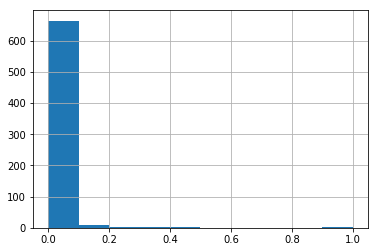

In [50]:
###STANDARDIZATION EXAMPLE 1. USE THIS FOR ALL THE COLUMNS
fake = df 
#fake.replace({'-',0 or median})
fake.first_day_trading_price.sort_values()

pd.Series(min_max_scaler.fit_transform(np.array(fake['first_day_trading_price']).reshape(-1,1)).reshape(1,682)[0]).hist()
import matplotlib.pyplot as plt 
plt.show()